# Image Processing with Python: Point Processing Techniques

## Objective
- **Understand** the basic concepts of point processing in image processing.
- **Implement** simple point processing operations on images.
- **Observe** the effects of various image processing techniques on images.

## Requirements
- **Programming Language**: Python
- **Libraries**: 
  - `matplotlib` for image loading and display
  - `NumPy` for image manipulation
- **Environment**: Jupyter Notebook or any Python-compatible code editor

## Step 1: Loading and Viewing the Image

1. **Select** an image from your directory.
2. **Load** the image using `matplotlib` and display it.

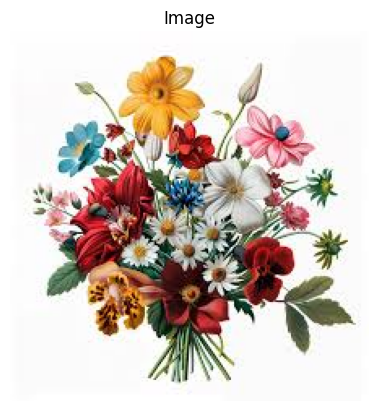

In [1]:
import numpy as np
from matplotlib import pyplot as plt

img = plt.imread('images.jpeg')
plt.imshow(img)
plt.title('Image')
plt.axis('off')
plt.show()

## Step 2:Inspecting the Image Shape

- Print the **shape** of the loaded image array.
- For **grayscale images**, the array will have only **two dimensions**: `M×N`, where:
  - `M` is the height of the image.
  - `N` is the width of the image.

In [4]:
print("Image Type:", type(img))
print("Image Shape:", img.shape)
print("Number of Dimensions:", img.ndim)
print("Total Number of Pixels:", img.size)
print("Data Type of Pixels:", img.dtype)

Image Type: <class 'numpy.ndarray'>
Image Shape: (228, 221, 3)
Number of Dimensions: 3
Total Number of Pixels: 151164
Data Type of Pixels: uint8


## Step 3: Slicing the Image Array

- **Slicing** can be used to retrieve specific parts of the image array.
- The slicing follows the `start:stop:step` convention, which can be applied to:
  - **Rows**: Selecting specific rows in the image.
  - **Columns**: Selecting specific columns in the image.
  - **Channels**: Selecting specific color channels (e.g., R, G, B).

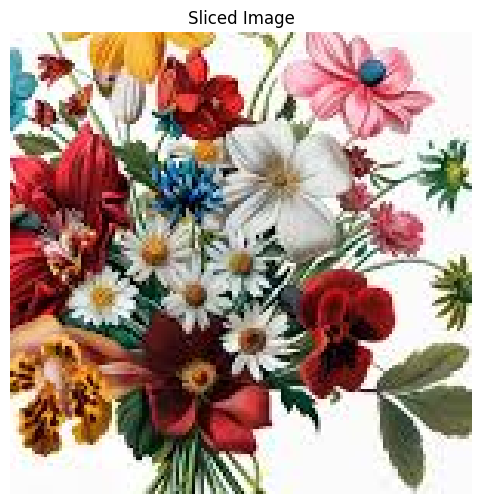

In [5]:
sliced_img = img[50:200, 50:200, :] # Example slice – adjust as needed
plt.figure(figsize=(6, 6))
plt.imshow(sliced_img)
plt.title('Sliced Image')
plt.axis('off')
plt.show()

## Step 4: Extracting and Displaying RGB Channels

- **RGB channels** are essential for representing colors in digital images.
- We can **separate each channel** (Red, Green, and Blue) and display them individually to observe their contribution to the overall image.



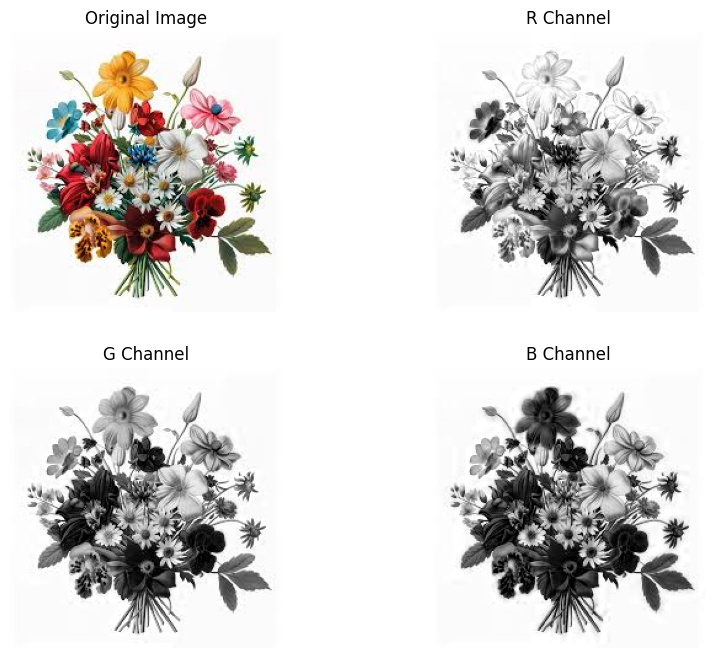

In [6]:
R = img[:, :, 0]
G = img[:, :, 1]
B = img[:, :, 2]

output = [img, R, G, B]
titles = ['Original Image', 'R Channel', 'G Channel', 'B Channel']

plt.figure(figsize=(10, 8))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.axis('off')
    plt.title(titles[i])
    if i == 0:
        plt.imshow(output[i])
    else:
        plt.imshow(output[i], cmap='gray')
plt.show()

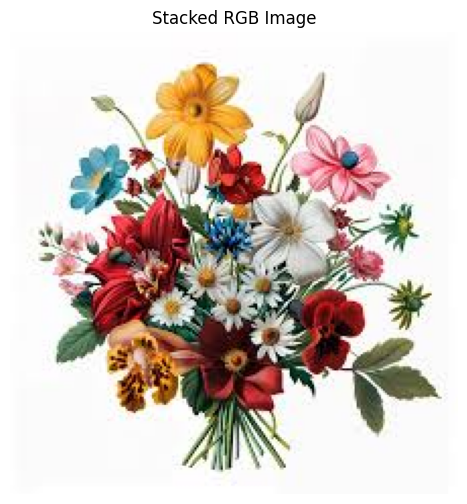

In [7]:
stacked_img = np.dstack((R, G, B))
plt.figure(figsize=(6, 6))
plt.imshow(stacked_img)
plt.title('Stacked RGB Image')
plt.axis('off')
plt.show()

## Step 5: Motion Difference

- Load and plot two images: **t4.png** and **t5.png**.
- **Subtract** the pixel values of `t4.png` from `t5.png` to create a new image, showing the **difference in motion** between the two.
- Display the resulting **difference image** to observe changes or motion between the frames.

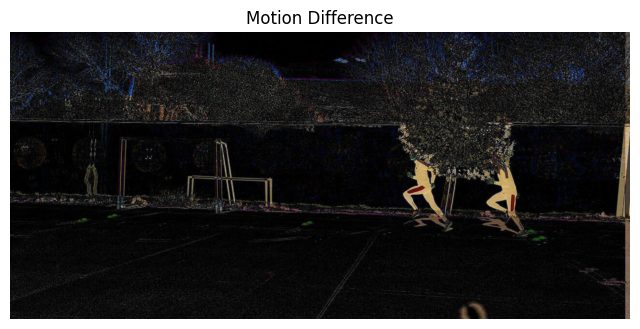

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

t4 = plt.imread('photo_2024-10-29_14-46-55.jpg')
t5 = plt.imread('photo_2024-10-29_14-47-24.jpg')

# Resize t4 to match the dimensions of t5
t4_resized = cv2.resize(t4, (t5.shape[1], t5.shape[0]))  # (width, height)

# Now you can perform the motion difference
if t4_resized.shape == t5.shape:  # Check if resizing was successful
    motion_diff = np.abs(t5.astype(np.int16) - t4_resized.astype(np.int16)).astype(np.uint8)

    plt.figure(figsize=(8, 6))
    plt.imshow(motion_diff)
    plt.title('Motion Difference')
    plt.axis('off')
    plt.show()
else:
    print("Error: Resizing failed or image dimensions still don't match.")

## Step 6: Applying Point Processing Techniques

1. **Darken the Image**
   - Apply a scaling factor to reduce pixel intensity, making the overall image darker.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


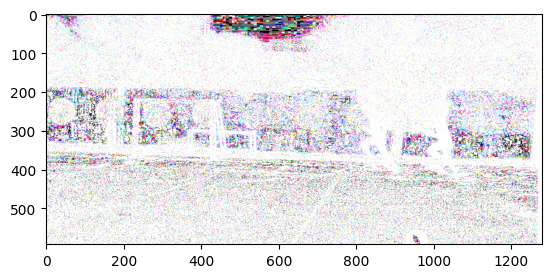

In [16]:
darker_img = motion_diff * 0.5
plt.imshow(darker_img)

2. **Reduce Contrast**
   - Use a transformation to reduce the difference between light and dark areas, creating a more uniform look across the image.

(-0.5, 1279.5, 592.5, -0.5)

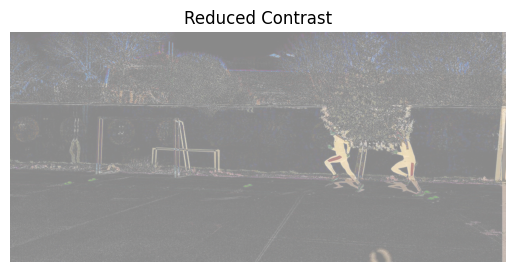

In [24]:
low_contrast_img = motion_diff * 0.5 + 137
low_contrast_img = np.clip(low_contrast_img, 0, 255).astype(np.uint8)

plt.imshow(low_contrast_img)
plt.title('Reduced Contrast')
plt.axis('off')

3. **Brighten the Image**
   - Increase the brightness by adding to the pixel values, resulting in a lighter, more vibrant image.



(-0.5, 1279.5, 592.5, -0.5)

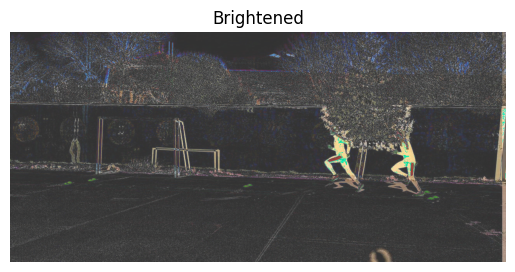

In [25]:
brightened_img = motion_diff + 50  # Add a constant value to all pixels
brightened_img = np.clip(brightened_img, 0, 255).astype(np.uint8)

plt.imshow(brightened_img)
plt.title('Brightened')
plt.axis('off')

4. **Increase Contrast**
   - Amplify the difference between light and dark areas, enhancing the sharpness and depth of the image.

(-0.5, 1279.5, 592.5, -0.5)

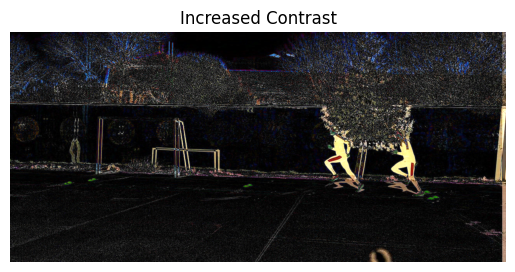

In [ ]:
high_contrast_img = motion_diff * 1.5   # Amplify the pixel differences.
high_contrast_img = np.clip(high_contrast_img, 0, 255).astype(np.uint8)

plt.imshow(high_contrast_img)
plt.title('Increased Contrast')
plt.axis('off')

## Conclusion

Through this lab, we explored the basics of **point processing in image processing**:

- Loading and manipulating **image data as NumPy arrays**.
- **Slicing** and working with **RGB channels**.
- Implementing basic **point processing techniques** such as darkening, brightening, contrast adjustment, and inversion.

These techniques provide foundational skills for more advanced image processing tasks in Python, offering a first look into transforming and enhancing images through pixel manipulation.